In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

SET1='W5000-H5000-MP30-Mochila30-PP1'
SET2='W5000-H5000-MP30-Mochila30-PP2'
SET3='W5000-H5000-MP30-Mochila30-PP3'
SET4='W500-H500-MP30-Mochila30-PP2'
SET5='W1000-H1000-MP30-Mochila30-PP2'
SET6='W1000-H1000-MP10-Mochila30-PP2'
SET7='W1000-H1000-MP5-Mochila5-PP2'

ds1 = pd.read_csv('data_set/out-'+SET1+'.csv')
ds2 = pd.read_csv('data_set/out-'+SET2+'.csv')
ds3 = pd.read_csv('data_set/out-'+SET3+'.csv')
ds4 = pd.read_csv('data_set/out-'+SET4+'.csv')
ds5 = pd.read_csv('data_set/out-'+SET5+'.csv')
ds6 = pd.read_csv('data_set/out-'+SET6+'.csv')
ds7 = pd.read_csv('data_set/out-'+SET7+'.csv')

%matplotlib inline

/Users/lucas/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Experimento variando el tamaño de la grilla

Vamos a considerar 3 tamaños de grilla distintos: 500x500, 1000x1000 y de 5000x5000. A su vez sobre cada uno de estas, distribuimos gimnasios y pokeparadas de forma aleatoria con distribución uniforme. El tamaño de la mochila es de 30 y el costo en pociones de cada gimnasion es un numero al azar entre 1 y 30. La cantidad de gimnasios varía desde 10 hasta 150 incrementando de a 10 y las pokeparadas son el doble de las necesarias para que haya solución para cada caso. Con esto, generamos 15 grillas distintas. Suponemos que el tamaño de la grilla no debería influir en cuanto a la mejora de la solución, ya que si los elementos estan cerca, el camino total no será largo, y consecuentemente, una mejora que se pueda conseguir no ahorrá mucha distancia. En cambio si la grilla es grande, los elementos van a estar más distanciados, entonces una mejora allí implicará ahorrar más distancia, pero como la solución también va a ser grande, en promedio deberíamos mejorar lo mismo que para grillas más compactas.

In [74]:
# sets: 4, 5 y 2
new_df = ds4.groupby(['opcion_busqueda','cant_gim']).mean()[['distancia_camino_greedy','distancia_camino']]
new_df['mejora'] = new_df['distancia_camino_greedy']-new_df['distancia_camino']
new_df['porcentaje'] = (new_df['mejora']*100)/new_df['distancia_camino_greedy']
data4 = new_df.ix[0][['porcentaje']].rename(columns={'porcentaje': 'porcentaje swap poke'})
data4['porcentaje swap gimasios'] = new_df.ix[1][['porcentaje']]

new_df = ds5.groupby(['opcion_busqueda','cant_gim']).mean()[['distancia_camino_greedy','distancia_camino']]
new_df['mejora'] = new_df['distancia_camino_greedy']-new_df['distancia_camino']
new_df['porcentaje'] = (new_df['mejora']*100)/new_df['distancia_camino_greedy']
data5 = new_df.ix[0][['porcentaje']].rename(columns={'porcentaje': 'porcentaje swap poke'})
data5['porcentaje swap gimasios'] = new_df.ix[1][['porcentaje']]

new_df = ds2.groupby(['opcion_busqueda','cant_gim']).mean()[['distancia_camino_greedy','distancia_camino']]
new_df['mejora'] = new_df['distancia_camino_greedy']-new_df['distancia_camino']
new_df['porcentaje'] = (new_df['mejora']*100)/new_df['distancia_camino_greedy']
data2 = new_df.ix[0][['porcentaje']].rename(columns={'porcentaje': 'porcentaje swap poke'})
data2['porcentaje swap gimasios'] = new_df.ix[1][['porcentaje']]

l1 = data4.mean().tolist()
l2 = data5.mean().tolist()
l3 = data2.mean().tolist()

d = {'1000x1000' : l2, '5000x5000' : l3, '500x500' : l1}

pd.DataFrame(d).rename(index={0: 'porcentaje mejora vecindario poke',1: 'porcentaje mejora vecindario gim'})




,1000x1000,5000x5000,500x500
porcentaje mejora vecindario poke,4.947385,4.485164,4.183824
porcentaje mejora vecindario gim,0.738344,0.523594,0.607241


En la tabla anterior se puede ver el promedio de los porcentajes de mejoras para un camino solución de cada grilla (para cada grilla se utilizó el mismo camino solución incial). Comparamos la solución generada por la heurística del punto 2 y luego la obtenidad a partir de aplicar búsqueda local con la vecindad de pokeparadas y la vecindad de gimnasios. Se puede ver que, como supusimos, el tamaño de la grilla no afecta a la mejora producida por ambas vecindades.

### Experimento variando la proporción de pokeparadas

Como vimos anteriormente, el tamaño de la grilla no afecta la calidad del resultado obtenido a partir de la búsqueda local. Ahora vamos a analizar que sucede si dada una grilla de tamaño fijo cambiamos la proporción de pokepardas. Para esto construimos 3 tipos distintos de grillas: una con la cantidad justa de pokeparadas necesarias para que el problema tenga solución (esto es, que la cantidad de pokeparadas sea igual a sumatoria de pociones requeridas por los gimnasios dividido 3), otra con el doble que el anterior, y la última con el triple que la inicial. Al aumentar la cantidad de pokeparadas pero no el tamaño de la grilla, va haber más pokeparadas que esten cerca de los gimnasios, por lo tanto, la solución inicial obtenida de la heurística va a mejorar si tiene más pokeparadas cercanas para utilizar. Entonces como el tamaño no varió pero si la concentración, partir de una solución que es mejor y luego mejorarla, va a tener un inpacto en el porcentaje mayor. 

In [19]:
# sets: 1, 2 y 3
new_df = ds1.groupby(['opcion_busqueda','cant_gim']).mean()[['distancia_camino_greedy','distancia_camino']]
new_df['mejora'] = new_df['distancia_camino_greedy']-new_df['distancia_camino']
new_df['porcentaje'] = (new_df['mejora']*100)/new_df['distancia_camino_greedy']
data1 = new_df.ix[0][['porcentaje']].rename(columns={'porcentaje': 'porcentaje swap poke'})
data1['porcentaje swap gimasios'] = new_df.ix[1][['porcentaje']]

new_df = ds2.groupby(['opcion_busqueda','cant_gim']).mean()[['distancia_camino_greedy','distancia_camino']]
new_df['mejora'] = new_df['distancia_camino_greedy']-new_df['distancia_camino']
new_df['porcentaje'] = (new_df['mejora']*100)/new_df['distancia_camino_greedy']
data2 = new_df.ix[0][['porcentaje']].rename(columns={'porcentaje': 'porcentaje swap poke'})
data2['porcentaje swap gimasios'] = new_df.ix[1][['porcentaje']]

new_df = ds3.groupby(['opcion_busqueda','cant_gim']).mean()[['distancia_camino_greedy','distancia_camino']]
new_df['mejora'] = new_df['distancia_camino_greedy']-new_df['distancia_camino']
new_df['porcentaje'] = (new_df['mejora']*100)/new_df['distancia_camino_greedy']
data3 = new_df.ix[0][['porcentaje']].rename(columns={'porcentaje': 'porcentaje swap poke'})
data3['porcentaje swap gimasios'] = new_df.ix[1][['porcentaje']]

l1 = data1.mean().tolist()
l2 = data2.mean().tolist()
l3 = data3.mean().tolist()

d = {'proporción justa' : l1, 'proporción doble' : l2, 'proporción triple' : l3}

pd.DataFrame(d).rename(index={0: 'porcentaje mejora vecindario poke',1: 'porcentaje mejora vecindario gim'})

,proporción doble,proporción justa,proporción triple
porcentaje mejora vecindario poke,4.485164,9.839817,3.189973
porcentaje mejora vecindario gim,0.523594,2.497128,1.723257


En la tabla anterior se puede ver los porcentajes de mejoras para grillas de tamaño 5000x5000, con una mochila de capacidad 30. La cantidad de gimnasios va desde 10 hasta 150 aumentando desde 10 para cada caso, y la cantidad de pokeparadas varían su proporción de acuerdo a lo mencionado anteriormente.
Al contrario de como pensábamos, la solución mejora más si la cantidad de pokeparadas es más ajustada. Esto puede suceder debido a que, si la solución utiliza todas las pokeparadas (o casi todas), la búsqueda local tiene más margen para la mejora, pudiendo realizar una mayor cantidad de swaps, que se traducen a una mayor distancia ahorrada. Para comprobar esto vamos a realizar otro experiento para ver si efectivamente la cantidad de mejoras a la solución inicial es mayor si la proporción de pokeparadas es más ajustada. También queremos ver que la solución incial efectivamente es mejor si se tienen más pokeparadas.

In [6]:
# sets: 1, 2 y 3
new_df = ds1.groupby(['opcion_busqueda','cant_gim']).mean()[['distancia_camino_greedy','cant_mejoras']]
data1 = new_df.ix[0][['distancia_camino_greedy','cant_mejoras']].rename(columns={'distancia_camino_greedy': 'solucion inicial', 'cant_mejoras': 'mejoras swap poke'})
data1['mejoras swap gim'] = new_df.ix[1][['cant_mejoras']]

new_df = ds2.groupby(['opcion_busqueda','cant_gim']).mean()[['distancia_camino_greedy','cant_mejoras']]
data2 = new_df.ix[0][['distancia_camino_greedy','cant_mejoras']].rename(columns={'distancia_camino_greedy': 'solucion inicial', 'cant_mejoras': 'mejoras swap poke'})
data2['mejoras swap gim'] = new_df.ix[1][['cant_mejoras']]

new_df = ds3.groupby(['opcion_busqueda','cant_gim']).mean()[['distancia_camino_greedy','cant_mejoras']]
data3 = new_df.ix[0][['distancia_camino_greedy','cant_mejoras']].rename(columns={'distancia_camino_greedy': 'solucion inicial', 'cant_mejoras': 'mejoras swap poke'})
data3['mejoras swap gim'] = new_df.ix[1][['cant_mejoras']]


l1 = data1.head(10).mean().tolist()
l2 = data2.head(10).mean().tolist()
l3 = data3.head(10).mean().tolist()

d = {'proporción justa' : l1, 'proporción doble' : l2, 'proporción triple' : l3}

pd.DataFrame(d).rename(index={0: 'solución inicial',1: 'cantidad mejoras vecindario poke',2: 'cantidad mejoras vecindario gim'})


,proporción doble,proporción justa,proporción triple
solución inicial,188351.334578,220913.439932,167232.922798
cantidad mejoras vecindario poke,101.900000,207.600000,74.700000
cantidad mejoras vecindario gim,2.900000,5.600000,3.000000


La tabla es un promedio de la solución inicial para cada una de las grillas con cantidad de gimnasios de 10 a 100 y luego la cantidad promedio de mejoras que se realizan a la solución en cada búsqueda. 
Como supusimos, en promedio la solución inicial con la que empieza la búsqueda local es mejor si tiene más pokeparadas para elegir (porque al estar distribuidas de forma uniforme estarán más cerca de gimnasios). También queda claro que la grilla con la proporción justa mejora más veces la solución inicial. Como la heurística se ve obligada a utilizar todas las pokeparadas, tiene menos opciones para elegir y como en la solución se utilizan todas, buscando permutaciones sucesivas de a un swap se ve que logra mejoras.

### Experimento comparando ambas vecindades

Ya vimos como afectan las variables de las grillas aleatorias a las soluciones mejoradas por las búsquedas locales. Ahora utilizaremos tamaños fijos para las grillas de 1000x1000 con una proporción del doble de pokeparadas necesarias para comparar las dos vecindades: swaps entre pokeparadas y swaps entre gimnasios de mismo costo.
A priori podemos notar que las vecindades tienen tamaños distintos. Los vecinos de swaps entre pokeparadas son del orden cuadrático en la cantidad de pokeparadas que contenga el camino solución inicial, mientras que el tamaño del vecindario para los gimnasios es cuadrático en la cantidad de gimnasios con igual costo.
Nuevamente vamos a tomar grillas que comiencen con 10 gimnasios hasta 150 aumentando de a 10. Primero vamos a fijar el valor de los gimnasios como un número aleatorio entre 1 y 30. La mochila tendrá capacidad 30 también. Además se promediarán 15 ejecuciones para medir los tiempos. Es de esperar que la vecindad de gimnasios crezca a partir del la grilla con 30 gimnasios, antes de eso la probabilidad que dos números enteros sean iguales entre 1 y 30 es baja. Suponemos que a medida que crezca la cantidad de gimnasios, que implica más vecinos, la solución generada por la búsqueda local con el vecindario de gimnasios aumente; mientras que la vecindad de pokeparadas suponemos que se mantendrá constante.

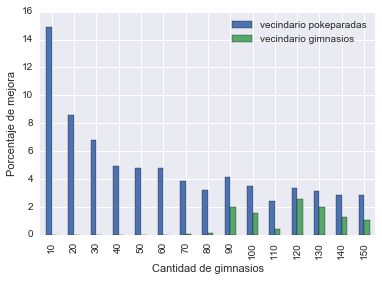

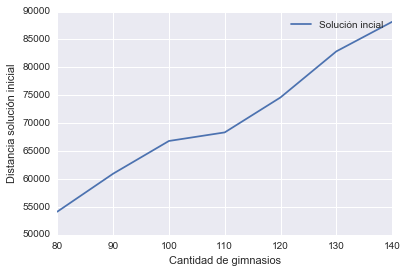

In [44]:
# sets 5, 6 y 7
SET5='W1000-H1000-MP30-Mochila30-PP2'
SET6='W1000-H1000-MP10-Mochila30-PP2'
SET7='W1000-H1000-MP5-Mochila5-PP2'

new_df = ds5.groupby(['opcion_busqueda','cant_gim']).mean()[['distancia_camino_greedy','distancia_camino']]
new_df['mejora'] = new_df['distancia_camino_greedy']-new_df['distancia_camino']
new_df['porcentaje'] = (new_df['mejora']*100)/new_df['distancia_camino_greedy']
data5 = new_df.ix[0][['porcentaje']].rename(columns={'porcentaje': 'porcentaje swap poke'})
data5['porcentaje swap gimasios'] = new_df.ix[1][['porcentaje']]

data5.plot(kind='bar')
plt.xlabel('Cantidad de gimnasios')
plt.ylabel('Porcentaje de mejora')
L=plt.legend()
L.get_texts()[0].set_text('vecindario pokeparadas')
L.get_texts()[1].set_text('vecindario gimnasios')
plt.show()

# ver el pico que decae

new_df = ds5.groupby(['cant_gim']).mean()[['distancia_camino_greedy']].head(14).tail(7).plot()
plt.xlabel(u'Cantidad de gimnasios')
plt.ylabel(u'Distancia solución inicial')
L=plt.legend()
L.get_texts()[0].set_text(u'Solución incial')


Al contrario de como supusimos, el porcentaje de mejoras para la vecindad de pokeparadas decrece a medida que crece la cantidad de gimnasios (consucuentemente la cantidad de pokeparadas y el largo del camino), y no se mantiene constante. Habría que analizar que sucede para valores más grandes y ver si efectivamente decrece o tiende a estabilizarse. Para los 110 gimnasios la solución mejora menos que para los puntos vecinos, podría deberse a que la solución incial encontrada por la heurística es menor que la tendencia lineal de los puntos anteriores. Con respecto al vecindario de los gimnasios recién a partir de 90 gimnasios se nota una mejora considerable y luego, al igual que para la otra vecindad, parecería que los valores de mejoras decrece.

Mantendremos los mismos tamaños de grilla que antes pero ahora el costo de los gimnasios va a variar entre 1 y 5. Ahora habrá una mayor cantidad de gimnasios con costo repetidos y esta cantidad aumentará proporcionalmente con el número de gimnasios.

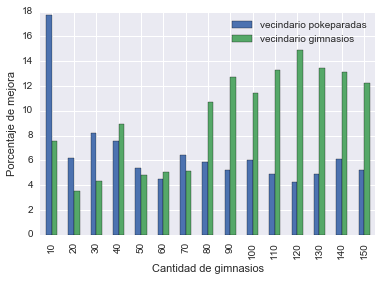

In [34]:
new_df = ds6.groupby(['opcion_busqueda','cant_gim']).mean()[['distancia_camino_greedy','distancia_camino']]
new_df['mejora'] = new_df['distancia_camino_greedy']-new_df['distancia_camino']
new_df['porcentaje'] = (new_df['mejora']*100)/new_df['distancia_camino_greedy']
data6 = new_df.ix[0][['porcentaje']].rename(columns={'porcentaje': 'porcentaje swap poke'})
data6['porcentaje swap gimasios'] = new_df.ix[1][['porcentaje']]

new_df = ds7.groupby(['opcion_busqueda','cant_gim']).mean()[['distancia_camino_greedy','distancia_camino']]
new_df['mejora'] = new_df['distancia_camino_greedy']-new_df['distancia_camino']
new_df['porcentaje'] = (new_df['mejora']*100)/new_df['distancia_camino_greedy']
data7 = new_df.ix[0][['porcentaje']].rename(columns={'porcentaje': 'porcentaje swap poke'})
data7['porcentaje swap gimasios'] = new_df.ix[1][['porcentaje']]

data7.plot(kind="bar")
plt.xlabel('Cantidad de gimnasios')
plt.ylabel('Porcentaje de mejora')
L=plt.legend()
L.get_texts()[0].set_text('vecindario pokeparadas')
L.get_texts()[1].set_text('vecindario gimnasios')
plt.show()


El porcentaje de mejoras a la solución inicial generada por el vecindario de pokeparas pareciera estabilizarse entre un 4% y 6%, mientras que en la búsqueda que usa los gimnasios de vecindarios crece, esto podría ser porque tiene más vecinos para analizar y porque los gimnasios se utilizan un su totalidad para la solución (esto mismo pasaba con las pokeparadas cuando la proporción era ajustada).

Tomando este último vecindario compararemos los tiempos de ejecución de cada caso:

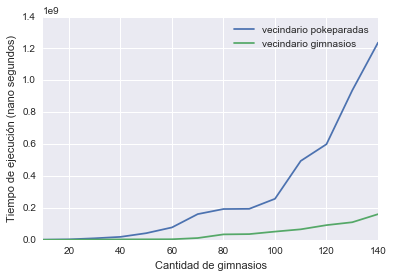

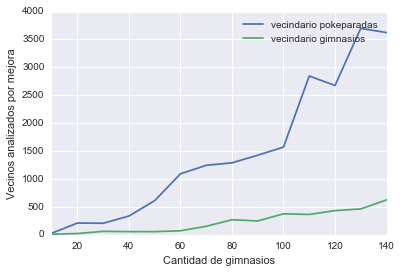

In [72]:
new_df = ds7.groupby(['opcion_busqueda','cant_gim']).mean()[['tiempo_busqueda']]
data7 = new_df.ix[0][['tiempo_busqueda']].rename(columns={'tiempo_busqueda': 'tiempo vecindario pokeparadas'})
data7['tiempo vecindario gimnasios'] = new_df.ix[1][['tiempo_busqueda']]

data7.head(14).plot()
plt.xlabel(u'Cantidad de gimnasios')
plt.ylabel(u'Tiempo de ejecución (nano segundos)')
L=plt.legend()
L.get_texts()[0].set_text('vecindario pokeparadas')
L.get_texts()[1].set_text('vecindario gimnasios')


# cantidad vecinos analizados en funcion de la cantidad de gimnasios

ds7['vecinos_p'] = ds7['vecinos_prom']/ds7['cant_mejoras']

new_df = ds7.groupby(['opcion_busqueda','cant_gim']).mean()[['vecinos_p']]
data7 = new_df.ix[0][['vecinos_p']].rename(columns={'vecinos_p': 'vecinos promedio vecindario pokeparadas'})
data7['vecinos promedio vecindario gimnasios'] = new_df.ix[1][['vecinos_p']]


data7.head(14).plot()
plt.xlabel(u'Cantidad de gimnasios')
plt.ylabel(u'Vecinos analizados por mejora')
L=plt.legend()
L.get_texts()[0].set_text('vecindario pokeparadas')
L.get_texts()[1].set_text('vecindario gimnasios') 

Podemos concluir que para la mayoría de los casos que analizamos el vecindario de las pokeparadas produce mejoras más grandes. Por otro lado, al ser un vecindario más grande en comparación con los gimnasios de mismo costo, requiere un mayor tiempo de cómputo. En el último experimento se pudo ver que si la cantidad de gimnasios con igual costo es alta, el vecindario de gimnasios es mejor en cuanto a calidad del resultado y en tiempo de ejecución.
También se puede ver que el tiempo de ejecución de la búsqueda local depende fuertemente de la cantidad de vecinos que analizó en cada iteración (los gráficos de tiempo en función de cantidad de nodos y cantidad de vecinos en función de cantidad de nodos tienen la misma proporción).

### Experimento: cantidad de iteraciones en función del largo del camino


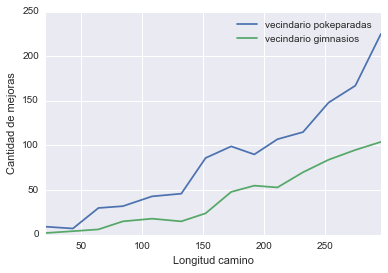

In [71]:
new_df = ds7.groupby(['opcion_busqueda','largo']).mean()[['cant_mejoras']]
data7 = new_df.ix[0][['cant_mejoras']].rename(columns={'cant_mejoras': 'vecinos promedio vecindario pokeparadas'})
data7['vecinos promedio vecindario gimnasios'] = new_df.ix[1][['cant_mejoras']]


data7.head(14).plot()
plt.xlabel(u'Longitud camino')
plt.ylabel(u'Cantidad de mejoras')
L=plt.legend()
L.get_texts()[0].set_text('vecindario pokeparadas')
L.get_texts()[1].set_text('vecindario gimnasios')